## Bosses por Ubicacion

Se usaran las coordenadas de las ubicaciones y se fusionaran con las coordenadas en px de la imagen que se utilizara para poder mostrarlas. Para ello se utiliza la funcion "custom_to_pixel"  ya que las coordenadas son personalizadas (no estan en lon/lat).

In [17]:
df_coords=dataframes['locations_coords']
df_locations=dataframes['locations']

In [18]:
df_coords.head(1)

,name,x,y
0,1st turtle testu's rise,-122.992187,54.972876


In [20]:
img_width = 9645
img_height = 9119

In [21]:
# Se limpian los nombres de ubicación para que coincidan
df_coords['name'] = df_coords['name'].str.lower().str.strip()
df_locations['location'] = df_locations['location'].str.lower().str.strip()

# Combinar los datos
df_combined = pd.merge(df_locations, df_coords, 
                       left_on='location', 
                       right_on='name',
                       how='left')

# Se verifica
df_combined[['location', 'x', 'y', 'creatures', 'bosses']].tail(1)

,location,x,y,creatures,bosses
285,uhl palace ruins,NaN,NaN,"['Clayman', 'Malformed Star']",NaN


En esta parte se eliminan durante el analisis las columnas indicadas sin que se modifique en los archivos.

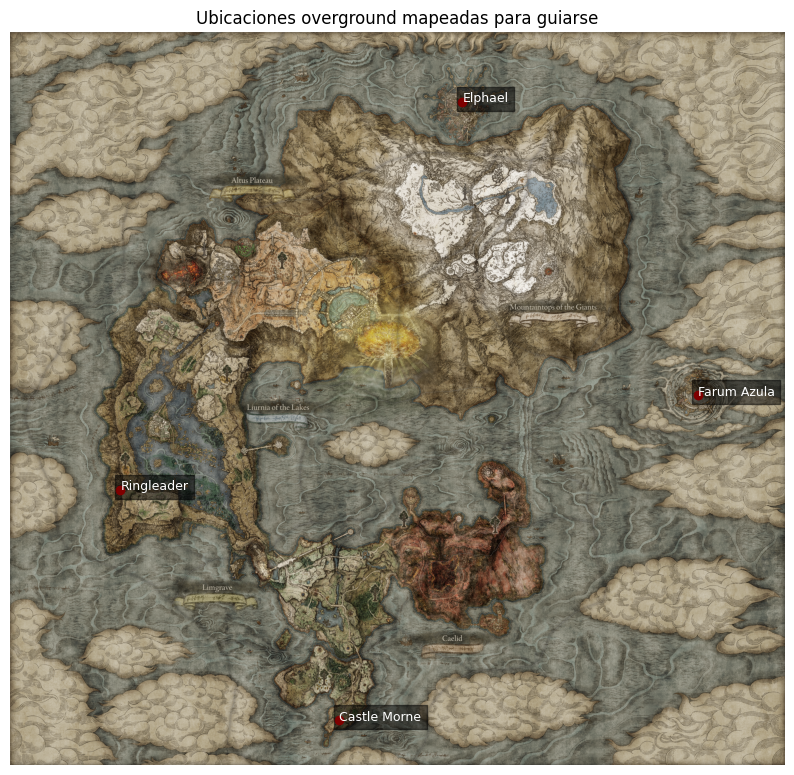

In [22]:
# Coordenadas en tu sistema personalizado (del mapa interactivo)
custom_coords = [
    (-126.859375, 218.48069),     # Crumbling Farum Azula
    (-154.898437, 44.199405),     # Ringleader's Evergaol
    (-37.757812, 147.136721),     # Elphael
    (-224.820312, 110.551353)     # Castle Morne
]

# Coordenadas correspondientes en píxeles de la imagen
pixel_coords = [
    (8562, 4511),   # Farum Azula
    (1377, 5692),   # Ringleader
    (5624, 877),    # Elphael
    (4087, 8574)    # Castle Morne
]

# Matriz A (custom coords + 1) y B (pixel coords)
A = np.hstack([custom_coords, np.ones((len(custom_coords), 1))])
B = np.array(pixel_coords)

# Resolución por mínimos cuadrados para obtener parámetros afines
X, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)

# Función para transformar coords personalizadas a pixel coords
def custom_to_pixel(x, y):
    return np.dot([x, y, 1], X)

# Cargar imagen del mapa sin bordes
img_path = r"C:\Users\sayur\Music\Lands_Between_Name.png"
img = Image.open(img_path)

# Mostrar imagen y puntos
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Mapea cada coordenada y dibuja
for name, (x, y) in zip(["Farum Azula", "Ringleader", "Elphael", "Castle Morne"], custom_coords):
    px, py = custom_to_pixel(x, y)
    plt.plot(px, py, 'ro')
    plt.text(px + 5, py, name, color='white', fontsize=9, bbox=dict(facecolor='black', alpha=0.5))

plt.title("Ubicaciones overground mapeadas para guiarse")
plt.axis('off')
plt.show()